In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('credit_messy.csv')

In [20]:
scorer = make_scorer(score_func=f1_score,greater_is_better=True)

In [3]:
y = df['Default']
X = df.drop(columns='Default', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

In [4]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
tree_clf.feature_importances_

array([0.09310454, 0.04860673, 0.01037333, 0.02125875, 0.01220523,
       0.05735636, 0.15927766, 0.03288231, 0.00879293, 0.00970528,
       0.00990925, 0.01024575, 0.0571876 , 0.03523992, 0.03626845,
       0.03469799, 0.04443628, 0.0498582 , 0.04894243, 0.05201862,
       0.04134069, 0.03769484, 0.03586563, 0.05273124])

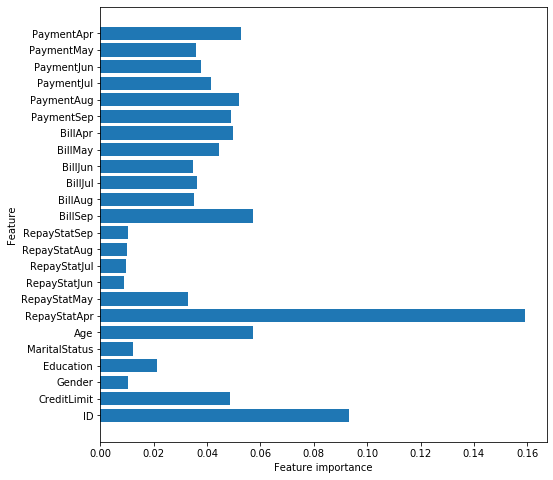

In [6]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [7]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
con_mat = confusion_matrix(y_test, pred)
clas_rep = classification_report(y_test, pred)

print(con_mat, '\n\n', clas_rep)

[[3812  884]
 [ 756  548]] 

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4696
           1       0.38      0.42      0.40      1304

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000



# Bagged Tree

In [10]:
# Fit to the training data
bagged_tree = BaggingClassifier()
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [11]:
# Training accuracy score
print("Training Accuracy for Bagging Tree Classifier: {:.4}%".format(bagged_tree.score(X_train, y_train) * 100))

Training Accuracy for Bagging Tree Classifier: 98.05%


In [12]:
# Test accuracy score
print("Testing Accuracy for Bagging Tree Classifier: {:.4}%".format(bagged_tree.score(X_test, y_test) * 100))

Testing Accuracy for Bagging Tree Classifier: 80.65%


In [25]:
param_grid = {'n_estimators': [9,10,11,12,13],
              'max_features' : [8,9,10,11]   
                }

gs_bt = GridSearchCV(bagged_tree, param_grid, cv=5, scoring=scorer)
gs_bt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [8, 9, 10, 11],
                         'n_estimators': [9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

In [26]:
gs_bt.best_params_

{'max_features': 11, 'n_estimators': 13}

# Random Forrest

In [23]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# Training accuracy score
print("Training Accuracy for Random Forest Classifier: {:.4}%".format(forest.score(X_train, y_train) * 100))

Training Accuracy for Random Forest Classifier: 97.98%


In [29]:
# Test accuracy score
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(forest.score(X_train, y_train) * 100))

Testing Accuracy for Random Forest Classifier: 97.98%


In [ ]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth' : [5,7,9,11],
              'max_features' : [5,7,9,11],
              'n_estimators' : [8,10,12,14]
                }

gs_rf = GridSearchCV(forest, param_grid, cv=5, scoring=scorer)
gs_rf.fit(X_train, y_train)

In [ ]:
gs_rf.best_params_